In [43]:
import random
import math
import matplotlib.pyplot as plt

4.6 独立 MH 法

In [124]:
class IdependentMH:
    def __init__(self,
                 start,
                 proposal_generator,
                 proposal_distribution,
                 target_distribution):
        self.theta = start
        self.generator = proposal_generator
        self.q = proposal_distribution
        self.f = target_distribution
        
        self.accepted = 0
        self.n = 0

    def __next__(self):
        a = self.generator()
        r = self.q(self.theta) * self.f(a) / (self.q(a) * self.f(self.theta))
        if random.random() < r:
            self.theta = a
            self.accepted += 1
        self.n += 1
        return self.theta

In [137]:
def experiment(alg, T, B):
    data = []
    for _ in range(T):
        data.append(alg.__next__())
    print(f"受容率: {alg.accepted}/{alg.n} = {alg.accepted / alg.n}")
    plt.hist(data[], bins=int(math.log(100000)*2))
    plt.show()
    plt.plot(data)
    plt.show()

4.6.1 波平釣果問題

受容率: 41299/100000 = 0.41299


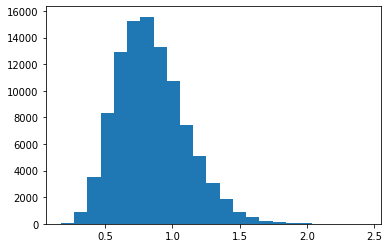

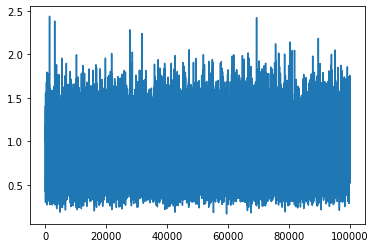

In [138]:
alg = IdependentMH(1,
                   lambda: random.gauss(1, math.sqrt(0.5)),
                   lambda x: math.exp(-(x-1)**2),
                   lambda x: math.exp(-13*x) * x**10 if x > 0 else 0)

experiment(alg, 100000, 1000)

4.6.2 正選手問題

受容率: 3786/10000 = 0.3786


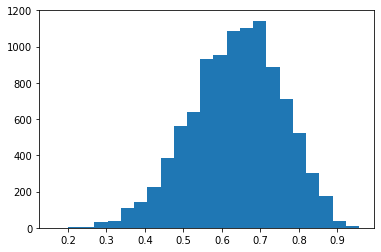

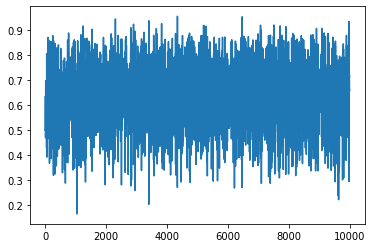

In [139]:
alg = IdependentMH(0.5,
                   lambda: random.random(),
                   lambda x: 1,
                   lambda x: x**9.2 * (1-x)**4.8)

experiment(alg, 10000, 1000)

4.7 ランダムウォーク MH 法

In [140]:
class RandomWalkMH:
    def __init__(self,
                 start,
                 generator,
                 target_distribution):
        self.theta = start
        self.generator = generator
        self.f = target_distribution
        
        self.accepted = 0
        self.n = 0

    def __next__(self):
        a = self.theta + self.generator()
        r = self.f(a) / self.f(self.theta)
        if random.random() < r:
            self.theta = a
            self.accepted += 1
        self.n += 1
        return self.theta

受容率: 9832/100000 = 0.09832


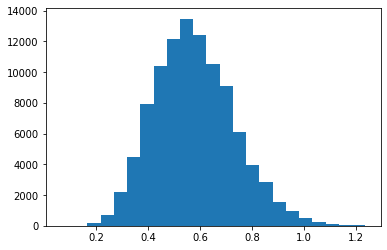

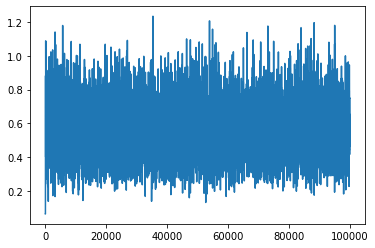

In [141]:
alg = RandomWalkMH(4,
                   lambda: random.gauss(0, math.sqrt(0.1)),
                   lambda x: math.exp(-13*x) * x**10 if x > 0 else 0)

experiment(alg, 100000, 1000)